# Manual Review of Promising Candidates

Here we list out a bunch of candidates and teir parameters which have promising weirdness in their ligghtcurves...
We'll add that to our talk... once the data is cumulated

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from scipy.optimize import curve_fit
import aliensims as dy
from transit import occultnonlin, occultquad

### List of candidates
<ol>
    <li>KIC 8110757: potential eclipsing binary but highly assymetric curve
    <li>KIC 5357901 (KOI 188b, Kepler-425): tidally fluctuating hot jupiter
    <li>KIC 5358624: tidally fluctuating hot jupiter
    <li>KIC 9651668: tidally fluctuating hot jupiter
    <li>KIC 5596440: heartbeat
    <li>KIC 11805075: personal curiosity - seems like normal transit
    <li>KIC 5215508: seems to be two flare events
    <li>KIC 9941662: seemsto be contact binary signatures
    <li>KIC 6372268: contact binary signatures
    <li>KIC 9025971: seems to be some tiny mid transit flares... could just be noise
    <li>KIC 8308347: personal curiosity
    <li>KIC 10975146: assymetric like 1
    <li>KIC 11449844: one flare dot mid transit - probably false alarm
</ol>

In [2]:
#Directory setting for candidate list
FILEPATH_FPS="E:\Masters_Project_Data\\alienworlds_fps\\"
k1 = 'kplr008110757-20160128150956_dvt.fits'
k2 = 'kplr005357901-20160128150956_dvt.fits'
k3 = 'kplr005358624-20160128150956_dvt.fits'
k4 = 'kplr009651668-20160128150956_dvt.fits'
k5 = 'kplr005596440-20160128150956_dvt.fits'
k6 = 'kplr011805075-20160128150956_dvt.fits'
k7 = 'kplr005215508-20160128150956_dvt.fits'
k8 = 'kplr009941662-20160128150956_dvt.fits'
k9 = 'kplr006372268-20160128150956_dvt.fits'
k10= 'kplr009025971-20160128150956_dvt.fits'
k11= 'kplr008308347-20160128150956_dvt.fits'
k12= 'kplr010975146-20160128150956_dvt.fits'
k13= 'kplr011449844-20160128150956_dvt.fits'



### Model fitting functions
Here are routines needed for fitting the models if and when...

In [93]:
#algol model:
def pl(z,p):

    if(1+p <z):
        return(0)

    elif(1-p<z and z<1+p):
        k0 = np.arccos((p**2 + z**2 - 1)/(2*p*z))
        k1 = np.arccos(( -p**2 + z**2 + 1)/(2*z))
        y = (1/np.pi)*(p**2*k0 + k1 - np.sqrt((4*z**2 - (1+z**2 -p**2)**2)/4))
        return(y)

    elif(z<1-p):
        return(p**2)

    elif(z<p-1):
        return(1)


def new_plar(ph,p,u1,u2,rorb):
    imp = 0.0
    znp = np.sqrt(np.abs(rorb*np.sin(ph*np.pi))**2+imp**2)
    a= occultquad(znp,p,[u1,u2])  
    return(a -1) 
    

def plar(ph,p,rorb):
    znp = np.abs(rorb*np.sin(ph*np.pi))
    op =[]
    for z in znp:
        if(1+p <z):
            op.append(0)

        elif(1-p<z and z<1+p):
            k0 = np.arccos((p**2 + z**2 - 1)/(2*p*z))
            k1 = np.arccos(( -p**2 + z**2 + 1)/(2*z))
            y = (1/np.pi)*(p**2*k0 + k1 - np.sqrt((4*z**2 - (1+z**2 -p**2)**2)/4))
            op.append(y)

        elif(z<1-p):
            op.append(p**2)

        elif(z<p-1):
            op.append(1)
    return(-np.array(op))

    #else: return(0)

Opening file and header:

In [116]:
hdu = fits.open(FILEPATH_FPS+k9)
print("number of TCEs:", len(hdu)-2)

flux = []
flux_white=[]
phase = []
model = []
tp = hdu[1].header['TPERIOD']
for ph, fl,wl, ml in zip(hdu[1].data['PHASE'],hdu[1].data['LC_DETREND'],hdu[1].data['LC_WHITE'],hdu[1].data['MODEL_WHITE']):
    if not np.isnan(fl):
        flux.append(fl)
        phase.append(ph/tp)
        flux_white.append(wl)
        model.append(ml)
dfunb = pd.DataFrame(list(zip(phase, flux, flux_white, model)),columns=['phase', 'flux','flux_white', 'model'])
df=dfunb.sort_values('phase',axis=0,ascending='True')
print('size:',len(df))
#print(hdu[0].header)

number of TCEs: 3
size: 64402


4.766015201301986 4.0183832324018 11.382343890120527 5.219911587028712 5.220086969849203 5.219954637415466


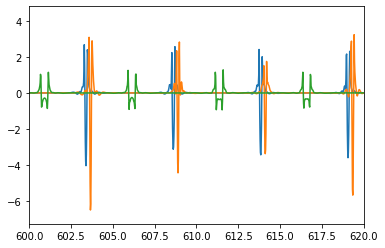

In [117]:
plt.plot(hdu[1].data['TIME'],hdu[1].data['MODEL_WHITE'])
plt.plot(hdu[2].data['TIME'],hdu[2].data['MODEL_WHITE'])
plt.plot(hdu[3].data['TIME'],hdu[3].data['MODEL_WHITE'])
#plt.plot(hdu[1].data['PHASE']*10)
plt.xlim(600,620)
#plt.ylim(-20,20)
print(hdu[1].header['TDUR'],hdu[2].header['TDUR'],hdu[3].header['TDUR'],hdu[1].header['TPERIOD'],hdu[2].header['TPERIOD'],hdu[3].header['TPERIOD'],)

### Limb Darkening Statistics
<table>
<tr>
    <td>KIC</td>
    <td>Rpl
    <td>Rorb
    <td>u1
    <td>u2
    <td>b
</tr>
<tr>
    <td>KIC 8110757</td>
    <td>0.037
    <td> 6.4
    <td>0.3975 (+.1)
    <td>0.2650
    <td>3.5193
</tr>
<tr>
    <td>KIC 5357901</td>
    <td>0.1168 
    <td>11.6
    <td>0.63 (-.1)
    <td>0.15
    <td>0.602
</tr>

<tr>
    <td>KIC 6372268</td>
    <td>0.04,0.03,0.002
    <td>24.4,17.7,51.52
    <td>1,-0.29,0.5 (-.1)
    <td>0,1,0
    <td>0
</tr>
</table>

In [127]:

# popt2, pcov2 = curve_fit(new_plar, np.array(df['phase']), np.array(df['flux']), 
#     bounds=([0.037,0.4974,0.2650,1], [1,0.4975,0.2651,40]))

popt3, pcov3 = curve_fit(new_plar, np.array(df['phase']), np.array(df['flux']), 
    bounds=([0.004,0,0,1.00001], [0.7,1.1,1,100]))

popte2, pcove2 = curve_fit(new_plar, np.array(df['phase'])-0.043, np.array(df['flux']), 
    bounds=([0.004,-1,-1,1.00001], [0.7,1.1,1,30]))

popte, pcove = curve_fit(new_plar, np.array(df['phase'])[40000:]-0.555, np.array(df['flux'])[40000:], 
    bounds=([0.0,0,0,1.00001], [0.7,1.1,1,100]))

# popte2, pcove2 = curve_fit(new_plar, np.array(df['phase'])[40000:]-0.555, np.array(df['flux'])[40000:], 
#    bounds=([0.0,0,0,1.00001], [0.7,1,1,100]))

In [128]:
print("Params:",np.round(popt3,2), np.round(popte2,2), np.round(popte,2))
print("Var",np.trace(pcov3))
# print("Params:",np.round(popt2,4))
# print("Var",np.trace(pcov2))
#print(np.array(df['phase'][63789]),np.array(df['phase'][0]))

Params: [ 0.04  1.1   0.   24.04] [ 0.03 -0.29  1.   17.07] [2.000e-02 5.000e-01 0.000e+00 5.152e+01]
Var 7.822468452713761


In [129]:
from scipy.signal import find_peaks,lombscargle
kernel = np.ones(50)/50
nf = np.convolve((df['flux']),kernel, mode='same')

plp, _ = find_peaks(-nf, height=0.0005, distance=400)
peakf = nf[plp]
print([el for el in zip(df['phase'][plp],peakf)])

[(-0.17960006940646323, -0.002111503934720531), (0.4293534590147767, -0.0026887259110299055), (0.26144540410521605, -0.0019858120178105313), (-0.008248366329813251, -0.0010288784725344159), (0.008235027138179897, -0.0008837257809136645), (-0.12055856774317636, -0.0011922036737996677), (0.2634628842239167, -0.0010273995356874367), (0.34604067192984655, -0.0014454192933044396), (0.32290908772647975, -0.0010427855491434456), (0.11847836466292885, -0.0007333814676303519), (0.37546542568562535, -0.0005027758019969042)]


c:\Users\Hp\Documents\FYProj\alienworlds\Sims\transit.py:829: RuntimeWarning: invalid value encountered in sqrt
  k = 0.5 * np.sqrt((1. - a) / (z * p))  # 8%


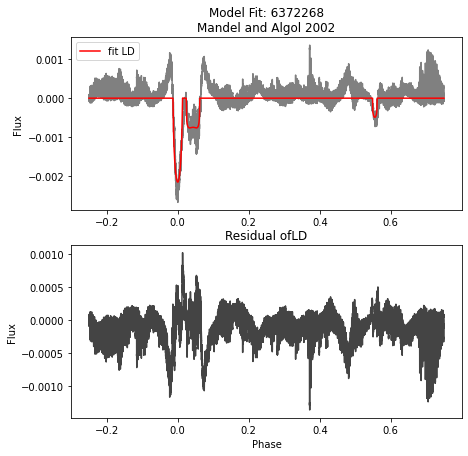

In [131]:
fig, ax = plt.subplots(2,1,figsize=(7,7))
#exp = new_plar(np.array(df['phase']), *popt2)
exp2 = new_plar(np.array(df['phase']), *popt3)

expe = new_plar(np.array(df['phase'])-0.555, *popte)
expe2 = new_plar(np.array(df['phase'])-0.043, *popte2)


# props = dict(boxstyle='round', facecolor='black', alpha=0.8, pad=1)
# txt = "$R_{pl}$/$R_{st}$:"+str(np.round(popt2[0],4))+"\nu1:"+str(np.round(popt2[1]-.1,4
#     ))+"\nu2:"+str(np.round(popt2[2],4))+"\n$R_{orb}/R_{st}$:"+str(np.round(popt2[3]/2,4))


# ax[1].text(0.80, 0.5, txt, fontsize=11,transform=ax[1].transAxes,  horizontalalignment='center',
#             verticalalignment='center', linespacing=2, bbox=props, color='white')
ax[0].set_title('Model Fit: 6372268\nMandel and Algol 2002')
#ax[0].scatter(np.array(df['phase'])[plp],nf[plp], zorder=2)
ax[0].plot(np.array(df['phase']),nf, color='gray', zorder=1)
# ax[0].plot(np.array(df['phase']), exp, color='black', label='fit LD')
ax[0].plot(np.array(df['phase']), exp2+expe+expe2, color='red', label='fit LD')
ax[1].set_title('Residual ofLD')
ax[1].set_xlabel('Phase')
ax[0].set_ylabel('Flux')
ax[0].legend()
ax[1].set_ylabel('Flux')
# ax[0].set_ylim(-0.0022,0.002)
# ax[1].set_ylim(-0.0015,0.001)
# ax[2].set_ylim(-0.0015,0.001)
#ax[0].set_xlim(-0.2,0.2)
#ax[1].set_xlim(-0.05,0.05)
#ax[2].set_xlim(-0.2,0.2)

ax[1].plot(np.array(df['phase']),np.convolve(exp2+expe+expe2- df['flux'], kernel, mode='same'), color='#444444')
plt.savefig("this_is_a_fit_6372268.jpg")


In [133]:
bins=np.linspace(min(df['phase']),max(df['phase']),4000)
#dfop = pd.DataFrame(zip(df['phase'], df['flux'],new_plar(np.array(df['phase']), *popt2)), columns=['phase','flux', 'model'])

dfop = pd.DataFrame(zip(df['phase'], nf,exp2+expe+expe2), columns=['phase','flux', 'model'])
#dfop = pd.DataFrame(zip(df['phase'], nf,exp), columns=['phase','flux', 'model'])
groups = dfop.groupby(np.digitize(df['phase'], bins))
dfop=groups.median()
dfop.to_csv('fprez_6372268.csv', sep=',', index=False)

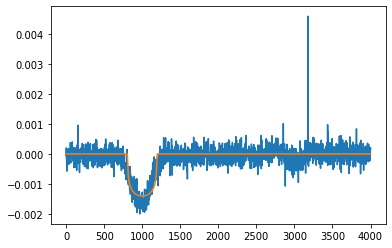

In [147]:

plt.plot(dfop['flux'])
plt.plot(dfop['model'])

In [148]:
#trying out a simulation
sim = dy.Simulator(1, 20000, 400, 0.1*np.pi, 0.3975, 0.2650)
meg = dy.Megastructure(6.98, True, 0.035, ecc=0, per_off=0, isrot=False)
sim.add_megs(meg)

# sim2 = dy.Simulator(1, 10000, 200, 0.1*np.pi, 2*0.3975, 0*0.2650)
# meg2 = dy.Megastructure(13.45, True, 1*0.035, ecc=0.377, per_off=np.pi/2, isrot=True)
# sim2.add_megs(meg2)

sim3 = dy.Simulator(1, 20000, 400, 0.1*np.pi, 0.3975, 0.2650)
meg3 = dy.Megastructure(6.98, True, 0.015, ecc=0, per_off=0, isrot=False)
sim3.add_megs(meg3)




In [149]:
netlc=[]
netph=[]
for i in range(50):
    np.random.seed(1234*i)
    road, ph, lc = sim.simulate_transit()
    netlc.append(lc)
    print('3d:',i)
    sim.initialize()

netlc3=[]
for i in range(50):
    np.random.seed(1234*i)
    road3, ph3, lc3 = sim3.simulate_transit()
    netlc3.append(lc3)
    print('3d2:',i)
    sim3.initialize()

'''netlc2=[]
for i in range(10):
    np.random.seed(3456*i)
    road2, ph2, lc2 = sim2.simulate_transit()
    netlc2.append(lc2)
    print('2d:',i)
    if(i==9): netph.append(ph2)
    sim2.initialize()'''

lc = np.mean(np.array(netlc), axis=0)
lc3 = np.mean(np.array(netlc3), axis=0)
#lc2 = np.mean(np.array(netlc2), axis=0)


3d: 0
3d: 1
3d: 2
3d: 3
3d: 4
3d: 5
3d: 6
3d: 7
3d: 8
3d: 9
3d: 10
3d: 11
3d: 12
3d: 13
3d: 14
3d: 15
3d: 16
3d: 17
3d: 18
3d: 19
3d: 20
3d: 21
3d: 22
3d: 23
3d: 24
3d: 25
3d: 26
3d: 27
3d: 28
3d: 29
3d: 30
3d: 31
3d: 32
3d: 33
3d: 34
3d: 35
3d: 36
3d: 37
3d: 38
3d: 39
3d: 40
3d: 41
3d: 42
3d: 43
3d: 44
3d: 45
3d: 46
3d: 47
3d: 48
3d: 49
3d2: 0
3d2: 1
3d2: 2
3d2: 3
3d2: 4
3d2: 5
3d2: 6
3d2: 7
3d2: 8
3d2: 9
3d2: 10
3d2: 11
3d2: 12
3d2: 13
3d2: 14
3d2: 15
3d2: 16
3d2: 17
3d2: 18
3d2: 19
3d2: 20
3d2: 21
3d2: 22
3d2: 23
3d2: 24
3d2: 25
3d2: 26
3d2: 27
3d2: 28
3d2: 29
3d2: 30
3d2: 31
3d2: 32
3d2: 33
3d2: 34
3d2: 35
3d2: 36
3d2: 37
3d2: 38
3d2: 39
3d2: 40
3d2: 41
3d2: 42
3d2: 43
3d2: 44
3d2: 45
3d2: 46
3d2: 47
3d2: 48
3d2: 49


In [4]:
from multiprocessing import Process, Pool

def test_multi_loops_3d(x):
    np.random.seed(1234*x)
    sim = dy.Simulator(1, 2000, 200, 0.1*np.pi, 2*0.3975, 0.2650)
    meg = dy.Megastructure(13.45, True, 0.035, ecc=0.377, per_off=np.pi/2)
    sim.add_megs(meg)
    sim.simulate_transit()
    if(x==0): print("Count:", meg.set)
    return(sim.frames,sim.lc)

def test_multi_loops_2d(x):
    np.random.seed(3456*x)
    sim2 = dy.Simulator(1, 2000, 200, 0.1*np.pi, 2*0.3975, 0.2650)
    meg2 = dy.Megastructure(13.45, True, 0.035, ecc=0.377, per_off=np.pi/2, isrot=True)
    sim2.add_megs(meg2)
    if(x==0): print("Count:", meg.set)
    sim.simulate_transit()
    return(sim.frames,sim.lc)



if __name__ == '__main__':
    # start 4 worker processes
    with Pool(processes=4) as pool:
        frm,lc2dsum = np.asarray(pool.map(test_multi_loops_2d, range(8)))
        lc2d = np.mean(lc2dsum, axis = 0)
        #print("--- %s min ---" % ((time.time() - start_time)/60))

        frm,lc3dsum = np.asarray(pool.map(test_multi_loops_3d, range(8)))
        #print("--- %s min ---" % ((time.time() - start_time)/60))

        lc3d = np.mean(lc3dsum, axis = 0)

        mn = (np.asarray(lc3d-lc2d)**2).sum()/len(lc3d)
        print(np.sqrt(mn))


Text(0, 0.5, 'Flux')

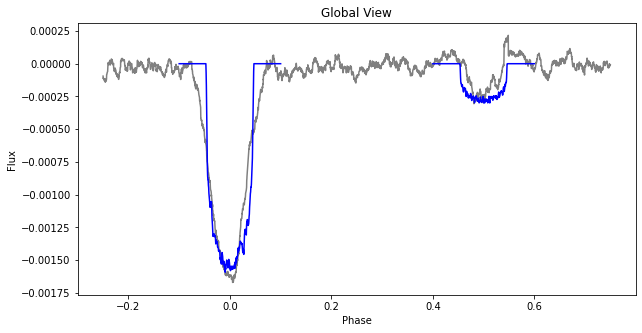

In [152]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(10,5))
#print(lc.shape, ph.shape)
kernel = np.ones(30)/30
plt.plot(np.array(df['phase']),np.convolve(np.array(df['flux']), kernel,mode='same'),color='gray')
plt.plot(np.array(ph)/np.pi,np.array(lc)-1, color='blue', label='3d')
#plt.plot(np.array(ph)/np.pi,np.array(lc2)-1, color='blue', label='2d')
plt.plot(np.array(ph)/np.pi+0.5,np.array(lc3)-1, color='blue', label='3d')
plt.title('Global View')
plt.xlabel('Phase')
plt.ylabel('Flux')
#plt.xlim(-0.1,+0.1)
#plt.ylim(-0.2,.2)
#plt.savefig('not_a_fit.png')